# Assignment 3
This assignment deals with using `textblob` and other open-source libraries to perform NLP-based analysis on documents using Python.  **All parts should use the same three documents (as outlined in Part 1 below).  In addition to your .ipynb and/or .py files, you must submit the three documents in .txt format, as well as a report document in .txt/.pdf format that answers various questions below.  It is not necessary to submit the .csv file for Part 3, since we will be executing your code.  _Just make sure it works correctly!_**  

**Part 1:**<br> Select and download three texts of your choosing that represent different media or writing formats (for example, you could choose i. a novel, movie script, and play script or ii. a short story, poem, and novel, etc.)
**Make sure you briefly descibe your documents and explain the difference between them in a paragraph.** 

**Part 2:**<br>
(a) Compute word counts for each of your documents after excluding English stop words (and optionally, performing lemmatization and/or other preprocessing that you would like to employ).<br>
(b) Create and display a bar plot for each document that include word counts for the 25 most frequent words (after the above processing).<br>
(c) Create and display a word cloud for each document (using a mask image of your choice) that includes only the 100 most frequent words.  Note that you'll likely want to use the approach outlined in Session 25 that utilizes the `fitwords` method, since you will want data consistent with those for part (b).<br>(d) Do you see any notable difference between the documents wrt (b) and/or (c) above?  Try to explain why or why not, and whether or not these results are expected.<br>

**Part 3:**<br>
(a) Using your approach from **Part 2**, compute the 25 most _cumulatively commmon_ words across the three documents, along with the _cumulative counts_.  Remember that a given word can appear in 2 or even all 3 documents.  <br>
Ex: if the word "spider" appears 10 times in document 1, 6 times in document 2, and 5 times in document 3, its cumulative count will be 21.<br>
(b) Create a CSV file named **MCW.csv** with the following specifications:
i. The csv file should use the standard delimiter (,) <br> 
ii. The first row in the file should be a column header row denoted by the string "Word,Count" <br>
iii. The next 25 rows should be populated with the pairs of the 25 most cumulatively common words and counts, in descending order by count. <br>
iv. One final row should added of the form "Sum,(totalcount)" where (totalcount) represents the sum of the top 25 cumulative counts.<br>
A sample csv file is included to give you an idea of what to generate in practice.<br><br>
**Part 4:**<br>
(a) Use **Textatistic** to compute the _average_ of the Flesch–Kincaid, Gunning Fog, SMOG, and Dale–Chall scores for each document.   
(b) Are there noticeable differences among your documents's readability scores, and would you expect these differences (or lack of differences, if there are none) to be present among documents were you judging their readability manually?

**Part 5:**<br> 
(a) Use spaCy to compute the pairwise similarity between your documents (i.e. doc. 1 to doc. 2, doc. 1 to doc. 3, doc. 2 to doc. 3).<br>
(b) Do any of these similarity scores seem higher or lower than you would expect?  Explain your response.




In [2]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import imageio
import spacy


from nltk.corpus import stopwords
from pathlib import Path
from textblob import TextBlob
from wordcloud import WordCloud
from textatistic import Textatistic






nltk.download('stopwords') # errors messages when working with stopwords produced this as possible solution that seemed to work on my machine
nltk.download('punkt')  # errors messages when working with stopwords produced this as possible solution that seemed to work on my machine

import string # used for .isalpha() method returns true if the characters in the string are all alphabetic

uniquecolors = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', 
                '#2ca02c', '#98df8a', '#d62728', '#ff9896', 
                '#9467bd', '#c5b0d5', '#8c564b', '#c49c94', 
                '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', 
                '#bcbd22', '#dbdb8d', '#17becf', '#9edae5', 
                '#9edae5', '#9edae5', '#9edae5', '#9edae5', 
                '#9edae5']


[nltk_data] Downloading package stopwords to C:\Users\Jacob
[nltk_data]     K\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Jacob
[nltk_data]     K\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Start of Assignement 3
Text Files used: 1. BeeMovie.txt, 2. IlliadPoem.txt, 3. ReadyPlayerOne.txt 

In this assignemnt, we were tasked with finding 3 different sources of literature (book, poem, movie script) that we could use to perform Data Science processes on. Each of these sources of literature is represented as a.txt file and loaded into a TextBlob object. Each of these documents are unique type of writing while also being largely different in size. The Illiad by Homer is a poem of Greek literature. ReadyPlayerOne is a popular book now turned movie, but in our case, the ReadPlayerOne.txt file is the book. And finally, the BeeMovie.txt file is a movie script which is by far the shortest of the three .txt files

Part 1: After importing all the necessary libraries needed for this part of the assignemnt. We will create a TextBlob object for each of our three .txt files. Next we downloaded a list of English stop words from the NLTK library. We will use this list of stop words to filter out all of these stop words from our TextBlob objects. We then used the word_counts property's .items() method and then compare each item to the stop words using list comprehension. The .isalpha() method is used to filter out special characters leaving only tuples of words where all the characters are alphabetic. This removes special characters such as apostrophes, commas, periods, etc. which was affecting the results. During testing, I also printed the length of the list of items to make sure our list comprehension filter was working to remove words that we did not desire. Next we imported the itemgetter. This was done to make it easiser to sort our tuples. The sorted() function is used by passing in out item list of tuple and sorting the data. We then print the top 25 most common words and their respective counts as tuples.

### Code for Bee Movie --------------------------------

In [3]:
beeBlob = TextBlob(Path('BeeMovieScript.txt').read_text(encoding='utf-8')) # Reads and creates a TextBlob object form our textfile 

from nltk.corpus import stopwords 
stopwords = stopwords.words('english') # Loads English stopwords 

beeItems = beeBlob.word_counts.items() # assigns the word counts as an item form the TextBlob object
#print(len(beeItems))
beeItems = [item for item in beeItems if item[0] not in stopwords and item[0].isalpha()] # Filters out the stop words and non-althabetic words from the count
#print(len(beeItems))

from operator import itemgetter 
sortedbeeItems = sorted(beeItems, key=itemgetter(1), reverse=True) # Sorts the filtered word counts by their counts in decenting order 
print(sortedbeeItems[:25]) # Validation for the first 25 most frequent words 


[('bee', 89), ('bees', 57), ('know', 53), ('honey', 51), ('barry', 50), ('got', 45), ('right', 44), ('like', 38), ('get', 37), ('could', 34), ('oh', 31), ('ca', 30), ('one', 30), ('think', 29), ('yeah', 28), ('thinking', 27), ('see', 26), ('going', 24), ('life', 24), ('little', 23), ('make', 23), ('well', 23), ('flowers', 23), ('go', 21), ('yes', 21)]


### Graph for Bee Movie Script --------------------------------

<Axes: xlabel='Word'>

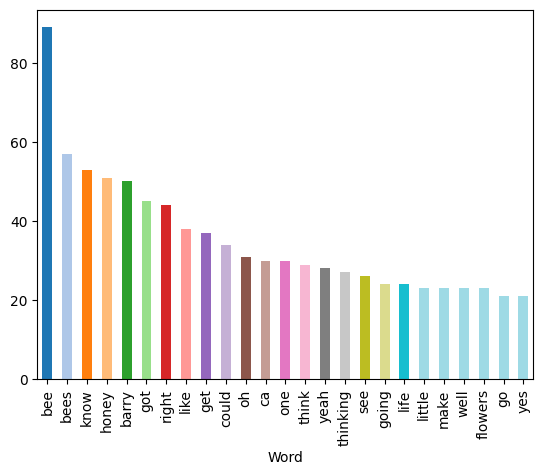

In [4]:
beeTop25 = sortedbeeItems[:25] # Selects the top 25 most frequent words and thier counts from the sorted list 

beedf = pd.DataFrame(beeTop25, columns=['Word', 'Count']) # Creates a pandas df from the beeTop25 to use for th graph

beedf.plot.bar(x='Word', y='Count', legend=False, color=uniquecolors) # Plots a bar chart using the df. Words are on the x-axis and counts is on the y-axis. Custom colors codes were generated for a uniquecolor variable 


### Word Cloud for Bee Movie Script --------------------------------

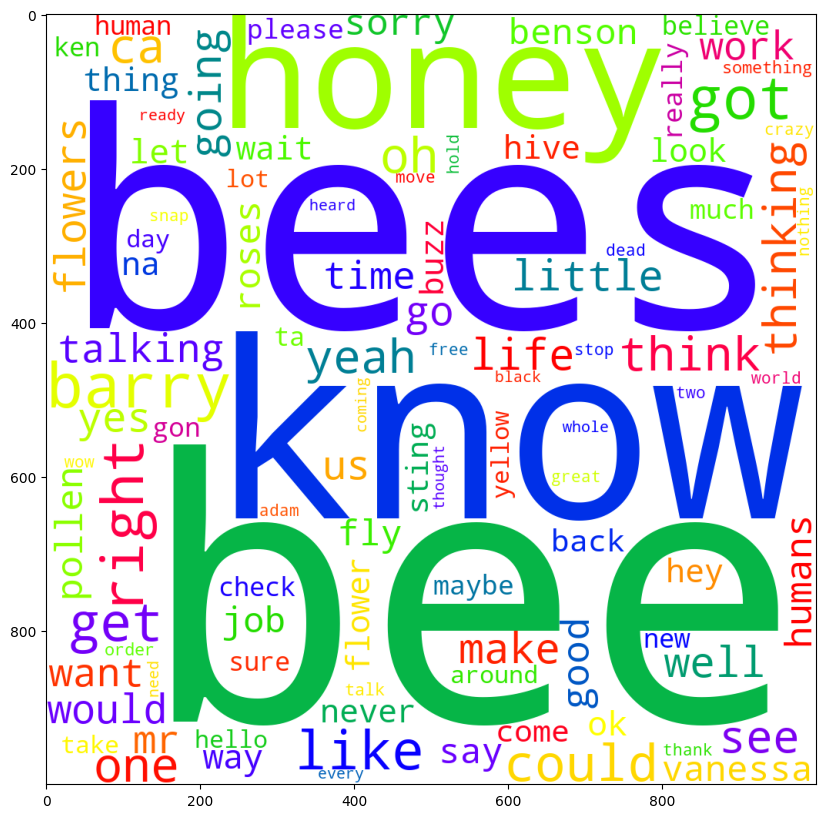

In [5]:
top100beeItems = dict(sortedbeeItems[0:100]) # Selects the top 100 mote frequent words and their counts

beewordCloud = WordCloud(width=1000, height=1000, background_color='white',colormap='prism') # Creates a wordcloud object

beewordCloud.fit_words(top100beeItems) # Fits the WordCloud object with the top 100 words 

plt.figure(figsize=(10, 10)) # Sets the figure size
plt.imshow(beewordCloud) # Displays the WordCloud object
#beewc = beewc.to_file('BeeMovieWordCloudHeart.png')


### Code for Illiad --------------------------------

In [6]:
illiadBlob = TextBlob(Path('IlliadPoem.txt').read_text(encoding='utf-8'))  # Reads and creates a TextBlob object form our textfile

illiadItems = illiadBlob.word_counts.items() # assigns the word counts as an item form the TextBlob object
#print(len(illiadItems))
illiadItems = [item for item in illiadItems if item[0] not in stopwords and item[0].isalpha()] # Filters out the stop words and non-althabetic words from the count
#print(len(illiadItems))

sortedilliadItems = sorted(illiadItems, key=itemgetter(1), reverse=True) # Sorts the filtered word counts by their counts in decenting order 
print(sortedilliadItems[:25]) # Validation for the first 25 most frequent words 


[('thy', 932), ('thus', 594), ('shall', 488), ('arms', 439), ('hector', 433), ('er', 428), ('jove', 411), ('great', 405), ('achilles', 366), ('war', 349), ('thou', 340), ('troy', 338), ('son', 285), ('yet', 281), ('gods', 281), ('god', 280), ('heaven', 280), ('let', 268), ('day', 263), ('chief', 252), ('fight', 252), ('hand', 244), ('plain', 244), ('vain', 236), ('eyes', 233)]


### Graph for Illiad Poem --------------------------------

<Axes: xlabel='Word'>

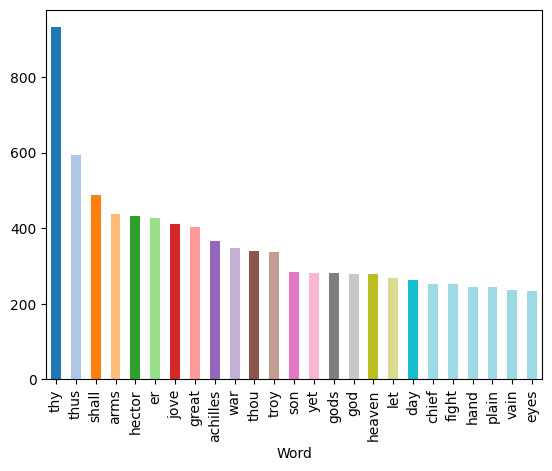

In [7]:
illiadTop25 = sortedilliadItems[:25] # Selects the top 25 most frequent words and thier counts from the sorted list

illiaddf = pd.DataFrame(illiadTop25, columns=['Word', 'Count'])# Creates a pandas df from the illiadTop25 to use for th graph

illiaddf.plot.bar(x='Word', y='Count', legend=False, color=uniquecolors) # Plots a bar chart using the df. Words are on the x-axis and counts is on the y-axis. Custom colors codes were generated for a uniquecolor variable 

### Word Cloud for Illiad Poem --------------------------------

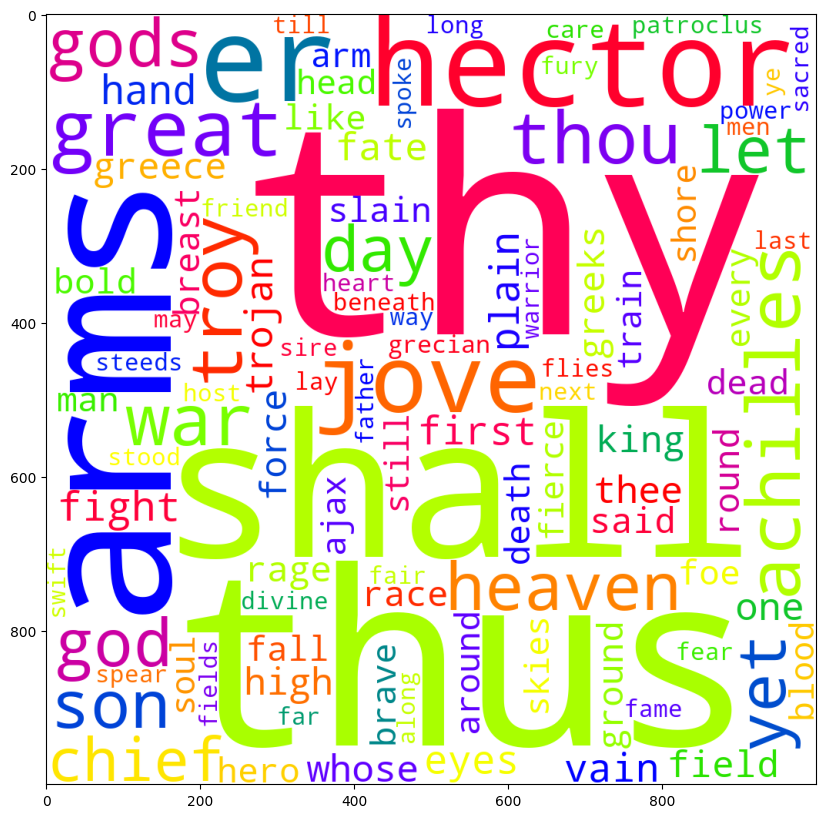

In [8]:
top100illiadItems = dict(sortedilliadItems[0:100]) # Selects the top 100 mote frequent words and their counts


illiadwordCloud = WordCloud(width=1000, height=1000, background_color='white', colormap='prism') # Creates a wordcloud object

illiadwordCloud.fit_words(top100illiadItems) # Fits the WordCloud object with the top 100 words 

plt.figure(figsize=(10, 10)) # Sets the figure size
plt.imshow(illiadwordCloud) # Displays the WordCloud object
#illiadwc = illiadwc.to_file('IlliadWordCloudHeart.png')


### Code for Ready Player One --------------------------------

In [9]:
rpoBlob = TextBlob(Path('ReadyPlayerOneBook.txt').read_text(encoding='utf-8')) # Reads and creates a TextBlob object form our textfile 

rpoItems = rpoBlob.word_counts.items() # assigns the word counts as an item form the TextBlob object
#print(len(rpoItems))
rpoItems = [item for item in rpoItems if item[0] not in stopwords and item[0].isalpha()] # Filters out the stop words and non-althabetic words from the count
#print(len(rpoItems))

sortedrpoItems = sorted(rpoItems, key=itemgetter(1), reverse=True) # Sorts the filtered word counts by their counts in decenting order 
print(sortedrpoItems[:25]) # Validation for the first 25 most frequent words 



[('said', 625), ('one', 499), ('would', 374), ('like', 373), ('could', 371), ('avatar', 369), ('oasis', 347), ('aech', 342), ('halliday', 318), ('artsmis', 314), ('time', 306), ('first', 293), ('right', 272), ('game', 257), ('back', 245), ('around', 218), ('key', 204), ('every', 199), ('sixers', 198), ('shoto', 197), ('began', 196), ('even', 190), ('still', 189), ('gate', 189), ('us', 184)]


### Graph for Ready Player One Book --------------------------------

<Axes: xlabel='Word'>

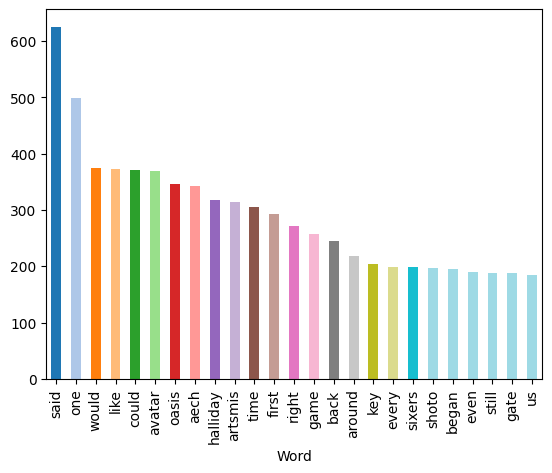

In [10]:
rpoTop25 = sortedrpoItems[:25] # Selects the top 25 most frequent words and thier counts from the sorted list 

rpodf = pd.DataFrame(rpoTop25, columns=['Word', 'Count']) # Creates a pandas df from the rpoTop25 to use for th graph

rpodf.plot.bar(x='Word', y='Count', legend=False, color=uniquecolors)# Plots a bar chart using the df. Words are on the x-axis and counts is on the y-axis. Custom colors codes were generated for a uniquecolor variable 

### Word Cloud for Ready Player One Book --------------------------------

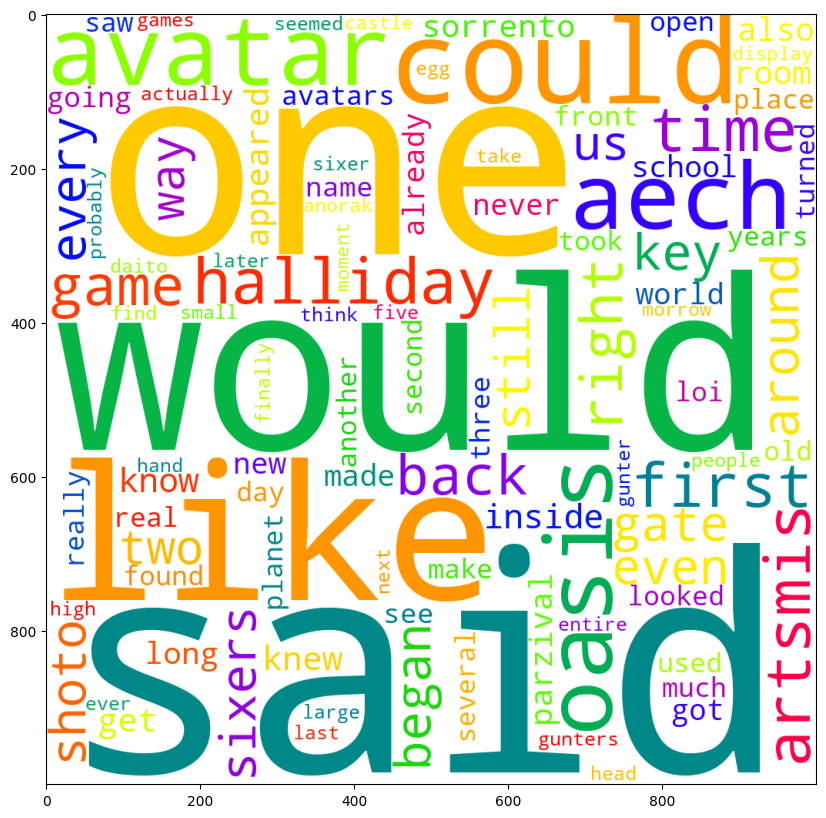

In [11]:
top100rpoItems = dict(sortedrpoItems[0:100]) # Selects the top 100 mote frequent words and their counts

rpowordCloud = WordCloud(width=1000, height=1000, background_color='white', colormap='prism') # Creates a wordcloud object

rpowordCloud.fit_words(top100rpoItems) # Fits the WordCloud object with the top 100 words 

plt.figure(figsize=(10, 10)) # Sets the figure size
plt.imshow(rpowordCloud) # Displays the WordCloud object

# Part 3 Cummulative Common Words --------------------------------

In [12]:
all_df = pd.concat([beedf, illiaddf, rpodf]) # Concatenates the df's 'beedf', 'illiaddf', and 'rpodf' into a single dataframe 

groupby_df = all_df.groupby('Word').sum() # Groups the concatenated df by 'Word' and the sum of the counts

sortby_df =groupby_df.sort_values('Count', ascending=False) # Sorts the grouped df by counts in descending order

top25_df = sortby_df.head(25) # Selects the top 25 words and thier counts

top25_df.reset_index(inplace=True) # Resets teh index of the df

print(top25_df) # validation that the top 25 cummulative word counts are displayed correctly



        Word  Count
0        thy    932
1       said    625
2       thus    594
3        one    529
4      shall    488
5       arms    439
6     hector    433
7         er    428
8       jove    411
9       like    411
10     could    405
11     great    405
12     would    374
13    avatar    369
14  achilles    366
15       war    349
16     oasis    347
17      aech    342
18      thou    340
19      troy    338
20  halliday    318
21     right    316
22   artsmis    314
23      time    306
24     first    293


In [13]:
top25_df.to_csv('MCW.csv', index=False) # Writes the df 'top25_df' to a csv file

with open('MCW.csv', 'a') as f: # Open the 'MCW.csv' file in append mode
    total_count = top25_df['Count'].sum() # Calculates the total count of all words in the top 25
    f.write(f'Sum,{total_count}\n') # Writes the total count as a new row in the CSV file 

# Part 4  Textatistic --------------------------------------

In [14]:
beeText = Path('BeeMovieScript.txt').read_text(encoding='UTF-8') # Reads the contents of the textfile as text
beeReadability = Textatistic(beeText) # Analyzes the readability of the text using Textatistic

%precision 2

beeReadability.dict() # Calculate and display the values for readibility statistics for the text


{'char_count': 40661,
 'word_count': 9219,
 'sent_count': 2020,
 'sybl_count': 10912,
 'notdalechall_count': 1418,
 'polysyblword_count': 269,
 'flesch_score': 102.07,
 'fleschkincaid_score': 0.16,
 'gunningfog_score': 2.99,
 'smog_score': 5.21,
 'dalechall_score': 6.29}

In [15]:
illiadText = Path('IlliadPoem.txt').read_text(encoding='UTF-8') # Reads the contents of the textfile as text
illiadReadability = Textatistic(illiadText) # Analyzes the readability of the text using Textatistic

%precision 2

illiadReadability.dict() # Calculate and display the values for readibility statistics for the text

{'char_count': 723857,
 'word_count': 152440,
 'sent_count': 6295,
 'sybl_count': 185456,
 'notdalechall_count': 41968,
 'polysyblword_count': 4385,
 'flesch_score': 79.33,
 'fleschkincaid_score': 8.21,
 'gunningfog_score': 10.84,
 'smog_score': 7.90,
 'dalechall_score': 9.18}

In [16]:
rpoText = Path('ReadyPlayerOneBook.txt').read_text(encoding='UTF-8') # Reads the contents of the textfile as text
rpoReadability = Textatistic(rpoText) # Analyzes the readability of the text using Textatistic

%precision 2

rpoReadability.dict() # Calculate and display the values for readibility statistics for the text

{'char_count': 628769,
 'word_count': 137784,
 'sent_count': 11065,
 'sybl_count': 176443,
 'notdalechall_count': 32308,
 'polysyblword_count': 6757,
 'flesch_score': 85.86,
 'fleschkincaid_score': 4.38,
 'gunningfog_score': 6.94,
 'smog_score': 7.59,
 'dalechall_score': 7.96}

### Observations from Textatistic --------------------------------------

After running the Textatistic function on the three .txt files, we are displayed with several important properties of the Textatistic object. The.dict() method is used to display these properties and shows us several key reabability stats as well as some basic infromation at the top. I was surprised to see that the Ready Player One book was only 20,000 words shorter than the Illiad poem but still contained more multi syllable words. This is unsusal to me because all of the stats show that the Illiad poem is less readable than both the other text files. We see this when looking at the scores listed as the bottom 4 rows of the displayed disctonary. These grades are used to show the minimum schooling (ex 8.21 would assume 8th grade reading level) that is reqired to read and understand the text. Each of the bottom 4 rows uses a different folmula to achieve a score. But it is clear above that the Illiad poem would be considered the hardest of the text files I chose. I also used the bee movie script from the beginning with the hypothisis that since it's not only is the shortest of the three files but it is also a movie made for children, and would be designed in a way to be understood by that audiance. This is more or less clear in the fact that all the scores for the bee text are vastly lower than Ready Player One and the Illiad poem confirming my hypothisis. 

# Part 5 spaCy

In [17]:
nlp = spacy.load('en_core_web_md') # Loads the medium-sized English language model fomr spaCy

beeDoc = nlp(beeText) # Passes 'beeText' using the spaCy model 
illiadDoc = nlp(illiadText) # Passes 'illiadText' using the spaCy model 
rpoDoc = nlp(rpoText) # Passes 'rpoText' using the spaCy model 

similar_1 = beeDoc.similarity(illiadDoc) # Calculates the similarity between 'beeText' and 'illiadText'
similar_2 = beeDoc.similarity(rpoDoc) # Calculate the similarity between 'beeText' and 'rpoText'
similar_3 = illiadDoc.similarity(rpoDoc) # Calculate the similarity between 'illiadText' and 'rpoText'

print(f"Similarity in beeText and illiadText: {similar_1}")
print(f"Similarity in beeText and rpoText: {similar_2}")
print(f"Similarity in illiadText and rpoText: {similar_3}")



KeyboardInterrupt: 

### Observations from SpaCy ------------------------------------------------

Based on the similarity scores obtained from comparing the three text's I chose show a lower similarity score between the beeText an illiadText. This low score is likely due to the hightly unrelated fields of text and different language styles used. When comparing Ready Player One with the beeText, we see a higher score which meansn they share more linguistic similarities than that of the Illiad, or it is also possible that they share more common topics. The highest score of them all was the comparison between the Illiad and Ready Player One. This shows these two text's have the most similar linguistic characteristics and content compared to any other comparison. I would say the comparison scores seem accurate to me. The largest difference in they type of text is between The Illiad poem and the Bee movie script. When they were written and the style in which they are written always led me to believe their comparison score would be the lowest of the 3. 